In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv("all_data_cleaned.csv")
df.head()
df.dropna(subset=['price'], inplace=True)
df['price'].value_counts()

$$      1793
$       1340
$$$      179
$$$$      49
Name: price, dtype: int64

In [3]:
def price_to_num(price):
    if price == '$':
        price = 1
    elif price == '$$':
        price = 2
    elif price == '$$$':
        price = 3
    elif price == '$$$$':
        price = 4
    return price

df['price'] = df['price'].apply(price_to_num)
df.head()

,Unnamed: 0,restaurant,address,recent_health_score,recent_health_risk,average_health_score,zipcode,yelp_business_id,rating,price,review_count,category_1,category_2,category_3,distance,cuisine,median_income,zip_lat,zip_lng
0,0,Norman's Ice Cream and Freezes,2801 Leavenworth St,96,Low Risk,96.000000,94133,sfAIpzEC8ywpy36YhzikmQ,4.5,1,289.0,Ice Cream & Frozen Yogurt,Coffee & Tea,Juice Bars & Smoothies,8.031888,Other,45203,37.804531,-122.410852
1,1,Chowders,Pier 39 Space A3,98,Low Risk,94.500000,94133,oic-xcRpi-yXG3KZ4go0mg,3.5,2,768.0,Seafood,Fish & Chips,Soup,57.334700,Other,45203,37.804531,-122.410852
2,2,XOX Truffles,754 Columbus Ave,94,Moderate Risk,94.000000,94133,qkHlhvv6DrCkvY54ogcPiA,4.5,1,604.0,Chocolatiers & Shops,Coffee & Tea,NaN,3.286580,Other,45203,37.804531,-122.410852
3,3,Centerfolds,391 Broadway St,90,Low Risk,90.857143,94133,6Ki5PvDCebTkCRkGEXD1qw,3.5,2,151.0,Cabaret,Strip Clubs,NaN,7.262056,Other,45203,37.804531,-122.410852
4,4,Caffe Puccini,411 Columbus Ave,90,Low Risk,90.000000,94133,uzqUJiCHUqV2c3PnvSsqeQ,4.0,1,966.0,Coffee & Tea,Desserts,Sandwiches,25.578495,Other,45203,37.804531,-122.410852


In [4]:
type(df.loc[0,'price'])

numpy.int64

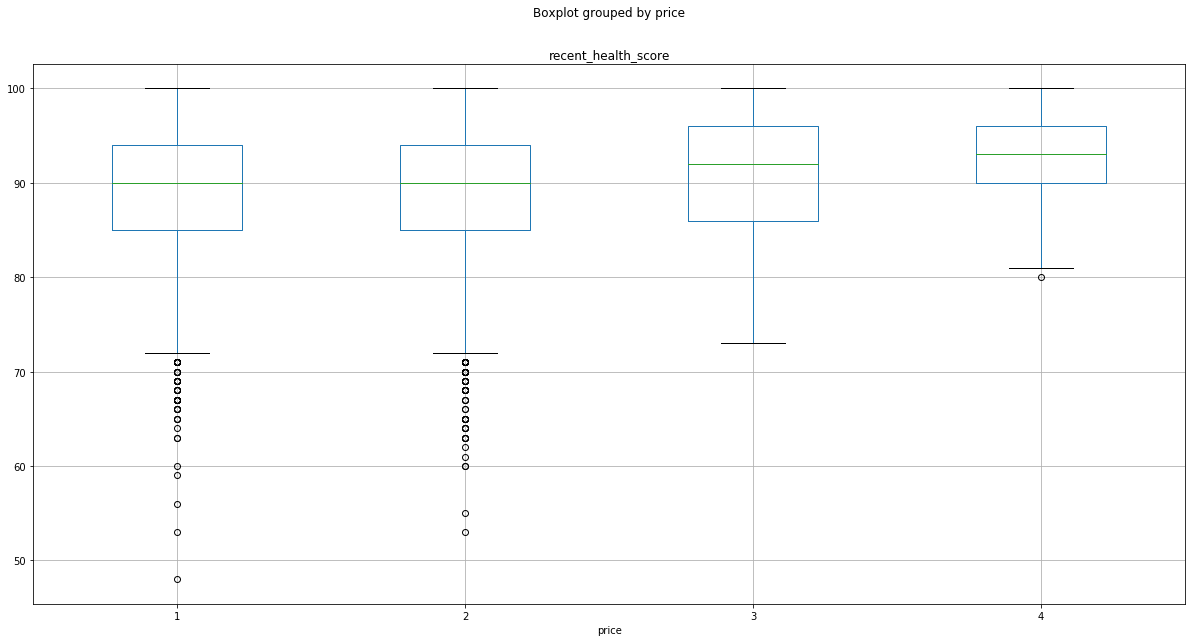

In [5]:
# Create a boxplot to compare means
df.boxplot("recent_health_score", by="price", figsize=(20, 10))

In [6]:
# Extract individual groups
group1 = df[df['price'] == 1]['recent_health_score']
group2 = df[df['price'] == 2]['recent_health_score']
group3 = df[df['price'] == 3]['recent_health_score']
group4 = df[df['price'] == 4]['recent_health_score']

In [8]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=10.460259377703325, pvalue=7.567901576715792e-07)